Importing

In [34]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d  
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



PCA

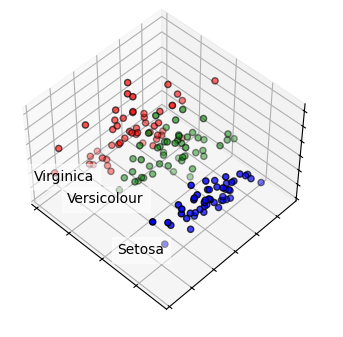

Total variance explained: 99.479 %


In [31]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a figure and 3D axes
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

# Perform PCA 
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# labels for each cluster
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)

# Specify a list of colors or use a colormap
colors = ['red' if label == 0 else 'blue' if label == 1 else 'green' for label in y]

# Create a scatter plot with colors based on the list of colors
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, edgecolor="k")

# Remove tick labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

print("Total variance explained:",round(sum(pca.explained_variance_ratio_)*100,3),"%")

Accuracy:  0.9555555555555556


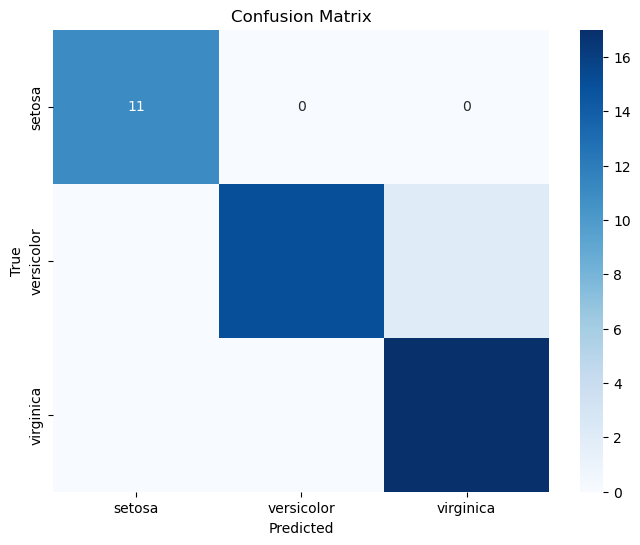

In [42]:

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Apply LDA
lda = LDA(n_components=2)  
X_train_r2 = lda.fit_transform(X_train, y_train)
X_test_r2 = lda.transform(X_test)

# Fit the LDA model to the training data
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: ",accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


QDA

Accuracy:  0.9333333333333333


<Axes: >

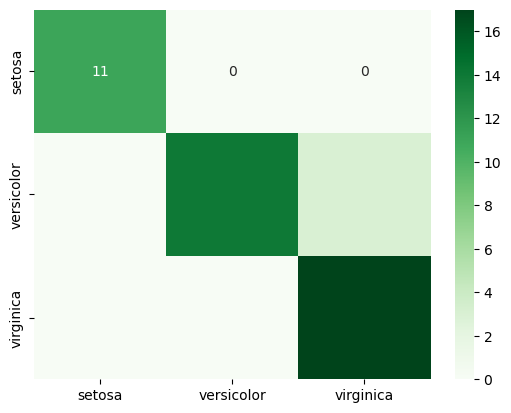

In [43]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Apply QDA
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Accuracy: ",accuracy,end="\n")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)


Logistic regression

accuracy :  1.0
Mean score from cross-validation: 96.67 %
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<Axes: >

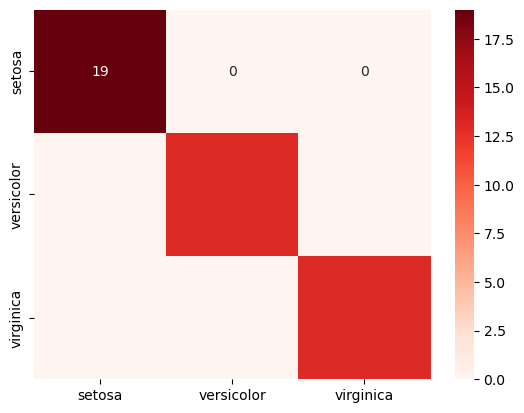

In [45]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("accuracy : ", accuracy)
sc = cross_val_score(logreg, X, y, cv=6)
print("Mean score from cross-validation:",round(sc.mean()*100,2),"%")

print("Confusion Matrix:\n",conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=iris.target_names, yticklabels=iris.target_names)


SVM ( linear )

Accuracy:  1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


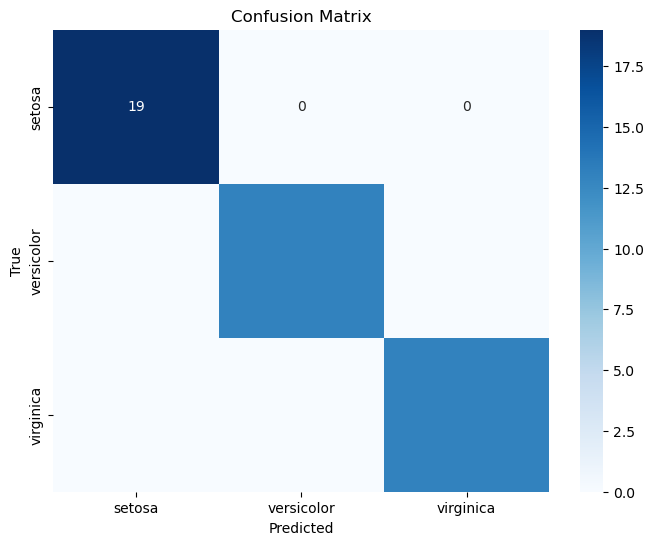

In [24]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SVM
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ",accuracy)
print("Confusion Matrix:\n",conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM ( polynomial )

Accuracy:  0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


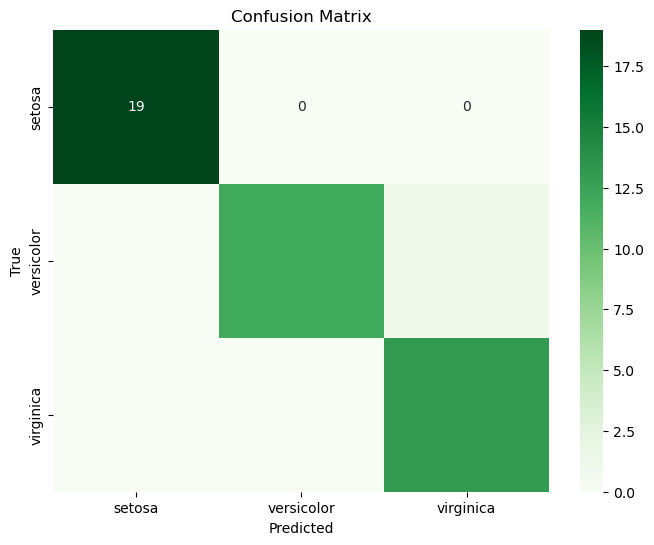

In [25]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SVM
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ",accuracy)
print("Confusion Matrix:\n",conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM (rbf)

Accuracy:  1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


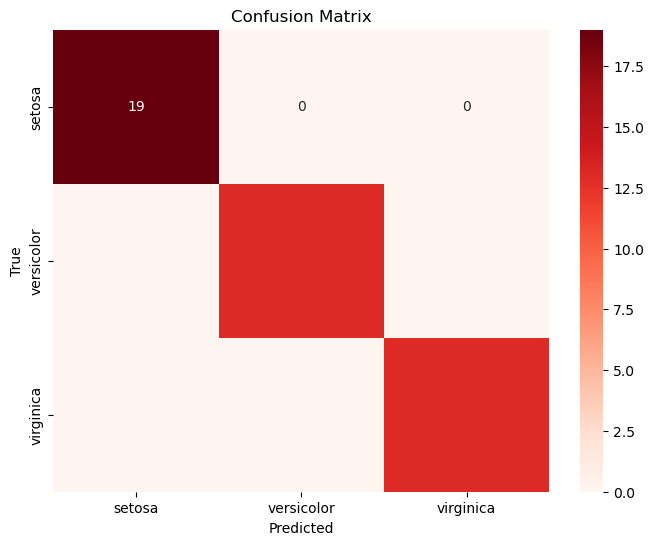

In [27]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SVM
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: ",accuracy)
print("Confusion Matrix:\n",conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
